# Step 1: Problem Definition & Data Understanding

**Objective:** Frame the business problem, define the ML task, load the dataset,
and perform an initial quality assessment.

---

## 1.1 Business Context

Airlines and travel platforms need accurate fare estimates to:
- Power **dynamic pricing strategies**
- Improve **recommendation engines** for travelers
- Forecast **revenue** across routes and seasons

**Business Question:**  
*Can we predict the total fare of a domestic/regional flight in Bangladesh
given the airline, route, travel date, and fare components?*

## 1.2 ML Task Definition

| Attribute | Value |
|-----------|-------|
| Task type | Supervised Regression |
| Target variable | `Total Fare` |
| Features | Airline, Source, Destination, Date, Base Fare, Tax & Surcharge |
| Success metrics | R², MAE, RMSE |

## 1.3 Environment Setup

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure src package is importable
sys.path.insert(0, "..")

from src.data_loader import load_dataset, inspect_dataset

print(f"Python {sys.version}")
print(f"pandas {pd.__version__}")
print(f"numpy {np.__version__}")

Python 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
pandas 2.1.4
numpy 1.26.2


## 1.4 Load the Dataset

In [2]:
df = load_dataset("../data/raw/Flight_Price_Dataset_of_Bangladesh.csv")

Loaded 57,000 rows × 17 columns from Flight_Price_Dataset_of_Bangladesh.csv


## 1.5 Initial Inspection

In [3]:
summary = inspect_dataset(df)

DATASET OVERVIEW

Shape: 57,000 rows × 17 columns

── Column Info ─────────────────────────────────────────
Airline                   object
Source                    object
Source Name               object
Destination               object
Destination Name          object
Departure Date & Time     object
Arrival Date & Time       object
Duration (hrs)           float64
Stopovers                 object
Aircraft Type             object
Class                     object
Booking Source            object
Base Fare (BDT)          float64
Tax & Surcharge (BDT)    float64
Total Fare (BDT)         float64
Seasonality               object
Days Before Departure      int64

── Missing Values ──────────────────────────────────────
Empty DataFrame
Columns: [count, percent]
Index: []

── Duplicates: 0 rows ──

── Descriptive Statistics ───────────────────────────────
       Duration (hrs)  Base Fare (BDT)  Tax & Surcharge (BDT)  Total Fare (BDT)  Days Before Departure
count    57000.000000     57000.0

In [4]:
# Detailed look at each column's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [5]:
df.describe()

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


In [6]:
df.head(10)

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90
5,IndiGo,ZYL,"Osmani International Airport, Sylhet",SPD,Saidpur Airport,2025-06-18 18:28:00,2025-06-18 19:33:06,1.085066,Direct,Airbus A320,Business,Travel Agency,5036.394160,200.000000,5236.394160,Regular,70
6,US-Bangla Airlines,SPD,Saidpur Airport,BZL,Barisal Airport,2025-10-25 22:41:00,2025-10-25 23:45:41,1.078155,Direct,Airbus A320,Business,Direct Booking,7397.669874,200.000000,7597.669874,Regular,28
7,AirAsia,JSR,Jessore Airport,LHR,London Heathrow Airport,2025-12-28 01:38:00,2025-12-28 10:30:49,8.880376,1 Stop,Airbus A350,Economy,Online Website,11946.813583,7792.022037,19738.835620,Winter Holidays,12
8,Etihad Airways,SPD,Saidpur Airport,KUL,Kuala Lumpur International Airport,2025-07-06 21:52:00,2025-07-07 01:09:46,3.296282,Direct,Boeing 787,Business,Travel Agency,74973.621871,17246.043281,92219.665152,Regular,23
9,US-Bangla Airlines,DAC,"Hazrat Shahjalal International Airport, Dhaka",DEL,"Indira Gandhi International Airport, Delhi",2025-04-14 23:19:00,2025-04-15 01:54:44,2.595620,Direct,Boeing 787,First Class,Direct Booking,116951.645445,19542.746817,136494.392261,Regular,41


## 1.6 Data Quality Catalog

In [7]:
# Missing values per column
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
pd.DataFrame({"Missing Count": missing, "Missing %": missing_pct}).sort_values("Missing Count", ascending=False)

,Missing Count,Missing %
Airline,0,0.0
Aircraft Type,0,0.0
Seasonality,0,0.0
Total Fare (BDT),0,0.0
Tax & Surcharge (BDT),0,0.0
Base Fare (BDT),0,0.0
Booking Source,0,0.0
Class,0,0.0
Stopovers,0,0.0
Source,0,0.0


In [8]:
# Duplicate rows
n_dup = df.duplicated().sum()
print(f"Duplicate rows: {n_dup:,} ({n_dup/len(df)*100:.2f}%)")

Duplicate rows: 0 (0.00%)


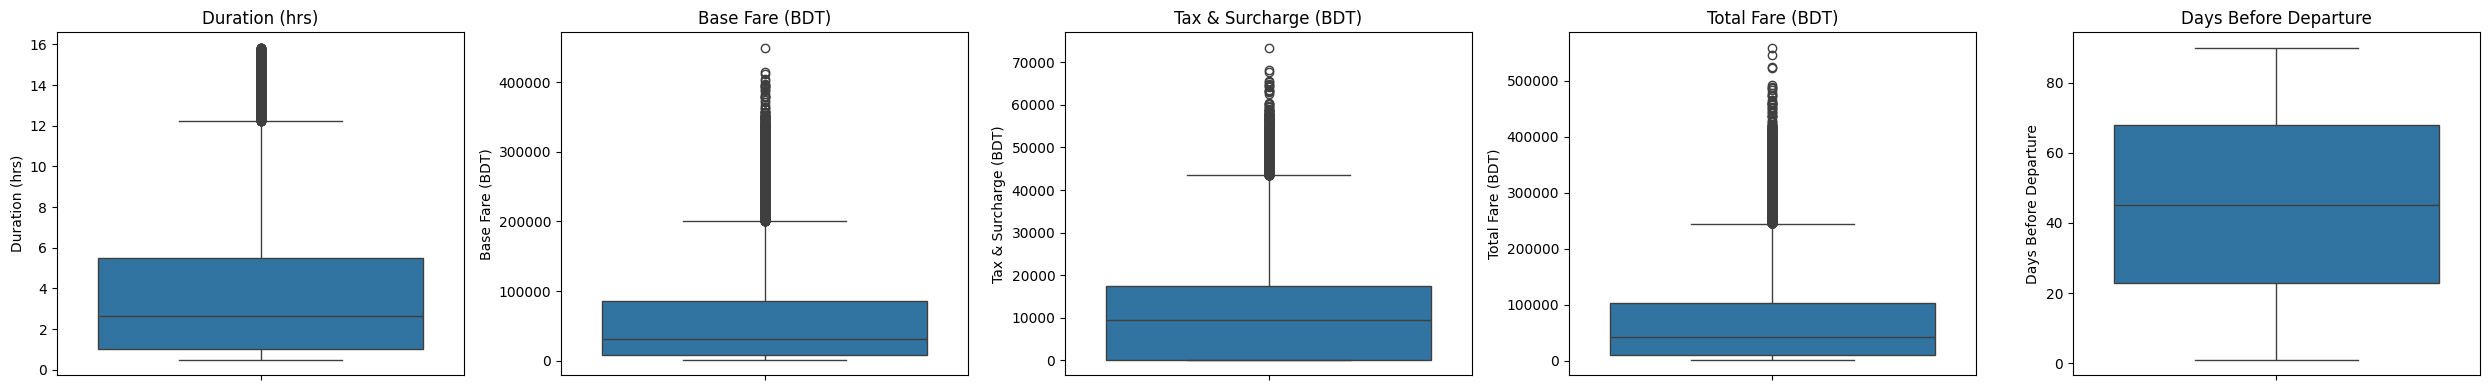

In [9]:
# Quick outlier check on numerical columns
num_cols = df.select_dtypes(include="number").columns.tolist()
if num_cols:
    fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 4))
    if len(num_cols) == 1:
        axes = [axes]
    for ax, col in zip(axes, num_cols):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

---

## Phase 1 Summary

### Dataset at a Glance

| Attribute | Value |
|-----------|-------|
| Raw shape | 57,000 rows × 17 columns |
| Missing values | 0 (100% complete) |
| Duplicate rows | 0 |
| Numeric columns | 5 (Duration, Base Fare, Tax & Surcharge, Total Fare, Days Before Departure) |
| Categorical columns | 12 (Airline, Source, Destination, Stopovers, Aircraft Type, Class, Booking Source, Seasonality, and redundant name/date cols) |

### Target Variable (Total Fare BDT)

| Statistic | Value |
|-----------|-------|
| Min | 1,801 BDT |
| Mean | 71,030 BDT |
| Median | 41,308 BDT |
| Max | 558,987 BDT |
| Std Dev | 81,769 BDT |

The wide min–max range (1,801 → 558,987 BDT, a 310× spread) and mean > median confirm a **right-skewed distribution** — a log-transform will be applied in Phase 2.

### Columns to Remove (Identified)
- `Source Name`, `Destination Name` — verbose duplicates of IATA codes
- `Arrival Date & Time` — derivable from Departure + Duration
- `Base Fare`, `Tax & Surcharge` — **data leakage** risk (Total Fare = Base + Tax); will be dropped before modeling

### Files Saved
None — this phase is exploration only.

### Next Step → Phase 2
Clean, engineer features, encode categoricals, apply log-transform, and produce train/test splits.